In [1]:
# import dataset
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
# read dataset
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/'
                      'wine.data',header = None)
df_wine.columns = ['Class label', 'Alcohol',
                  'Malic acid', 'Ash',
                  'Alcalinity of ash',
                  'Magnesium',
                  'Total phenols',
                  'Flavanoids',
                  'Nonflavanoid ohenols',
                  'Proanthocyanins',
                  'Color intensity','Hue',
                  'OD280/OD315 of diluted wines',
                  'Proine']
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid ohenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid ohenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proine
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = np.corrcoef(df_wine.values.T)
sns.set(font_scale=1.2)
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    hm = sns.heatmap(cm, 
                     mask=mask, 
                     vmax=.3,
                     cbar=True,
                     square=True,
                     fmt='.2f', 
                     xticklabels=df_wine.columns.values, 
                     yticklabels=df_wine.columns.values)

plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(20, 20)
fig.savefig('heatmap.png', dpi=100)
plt.show()

<Figure size 2000x2000 with 2 Axes>

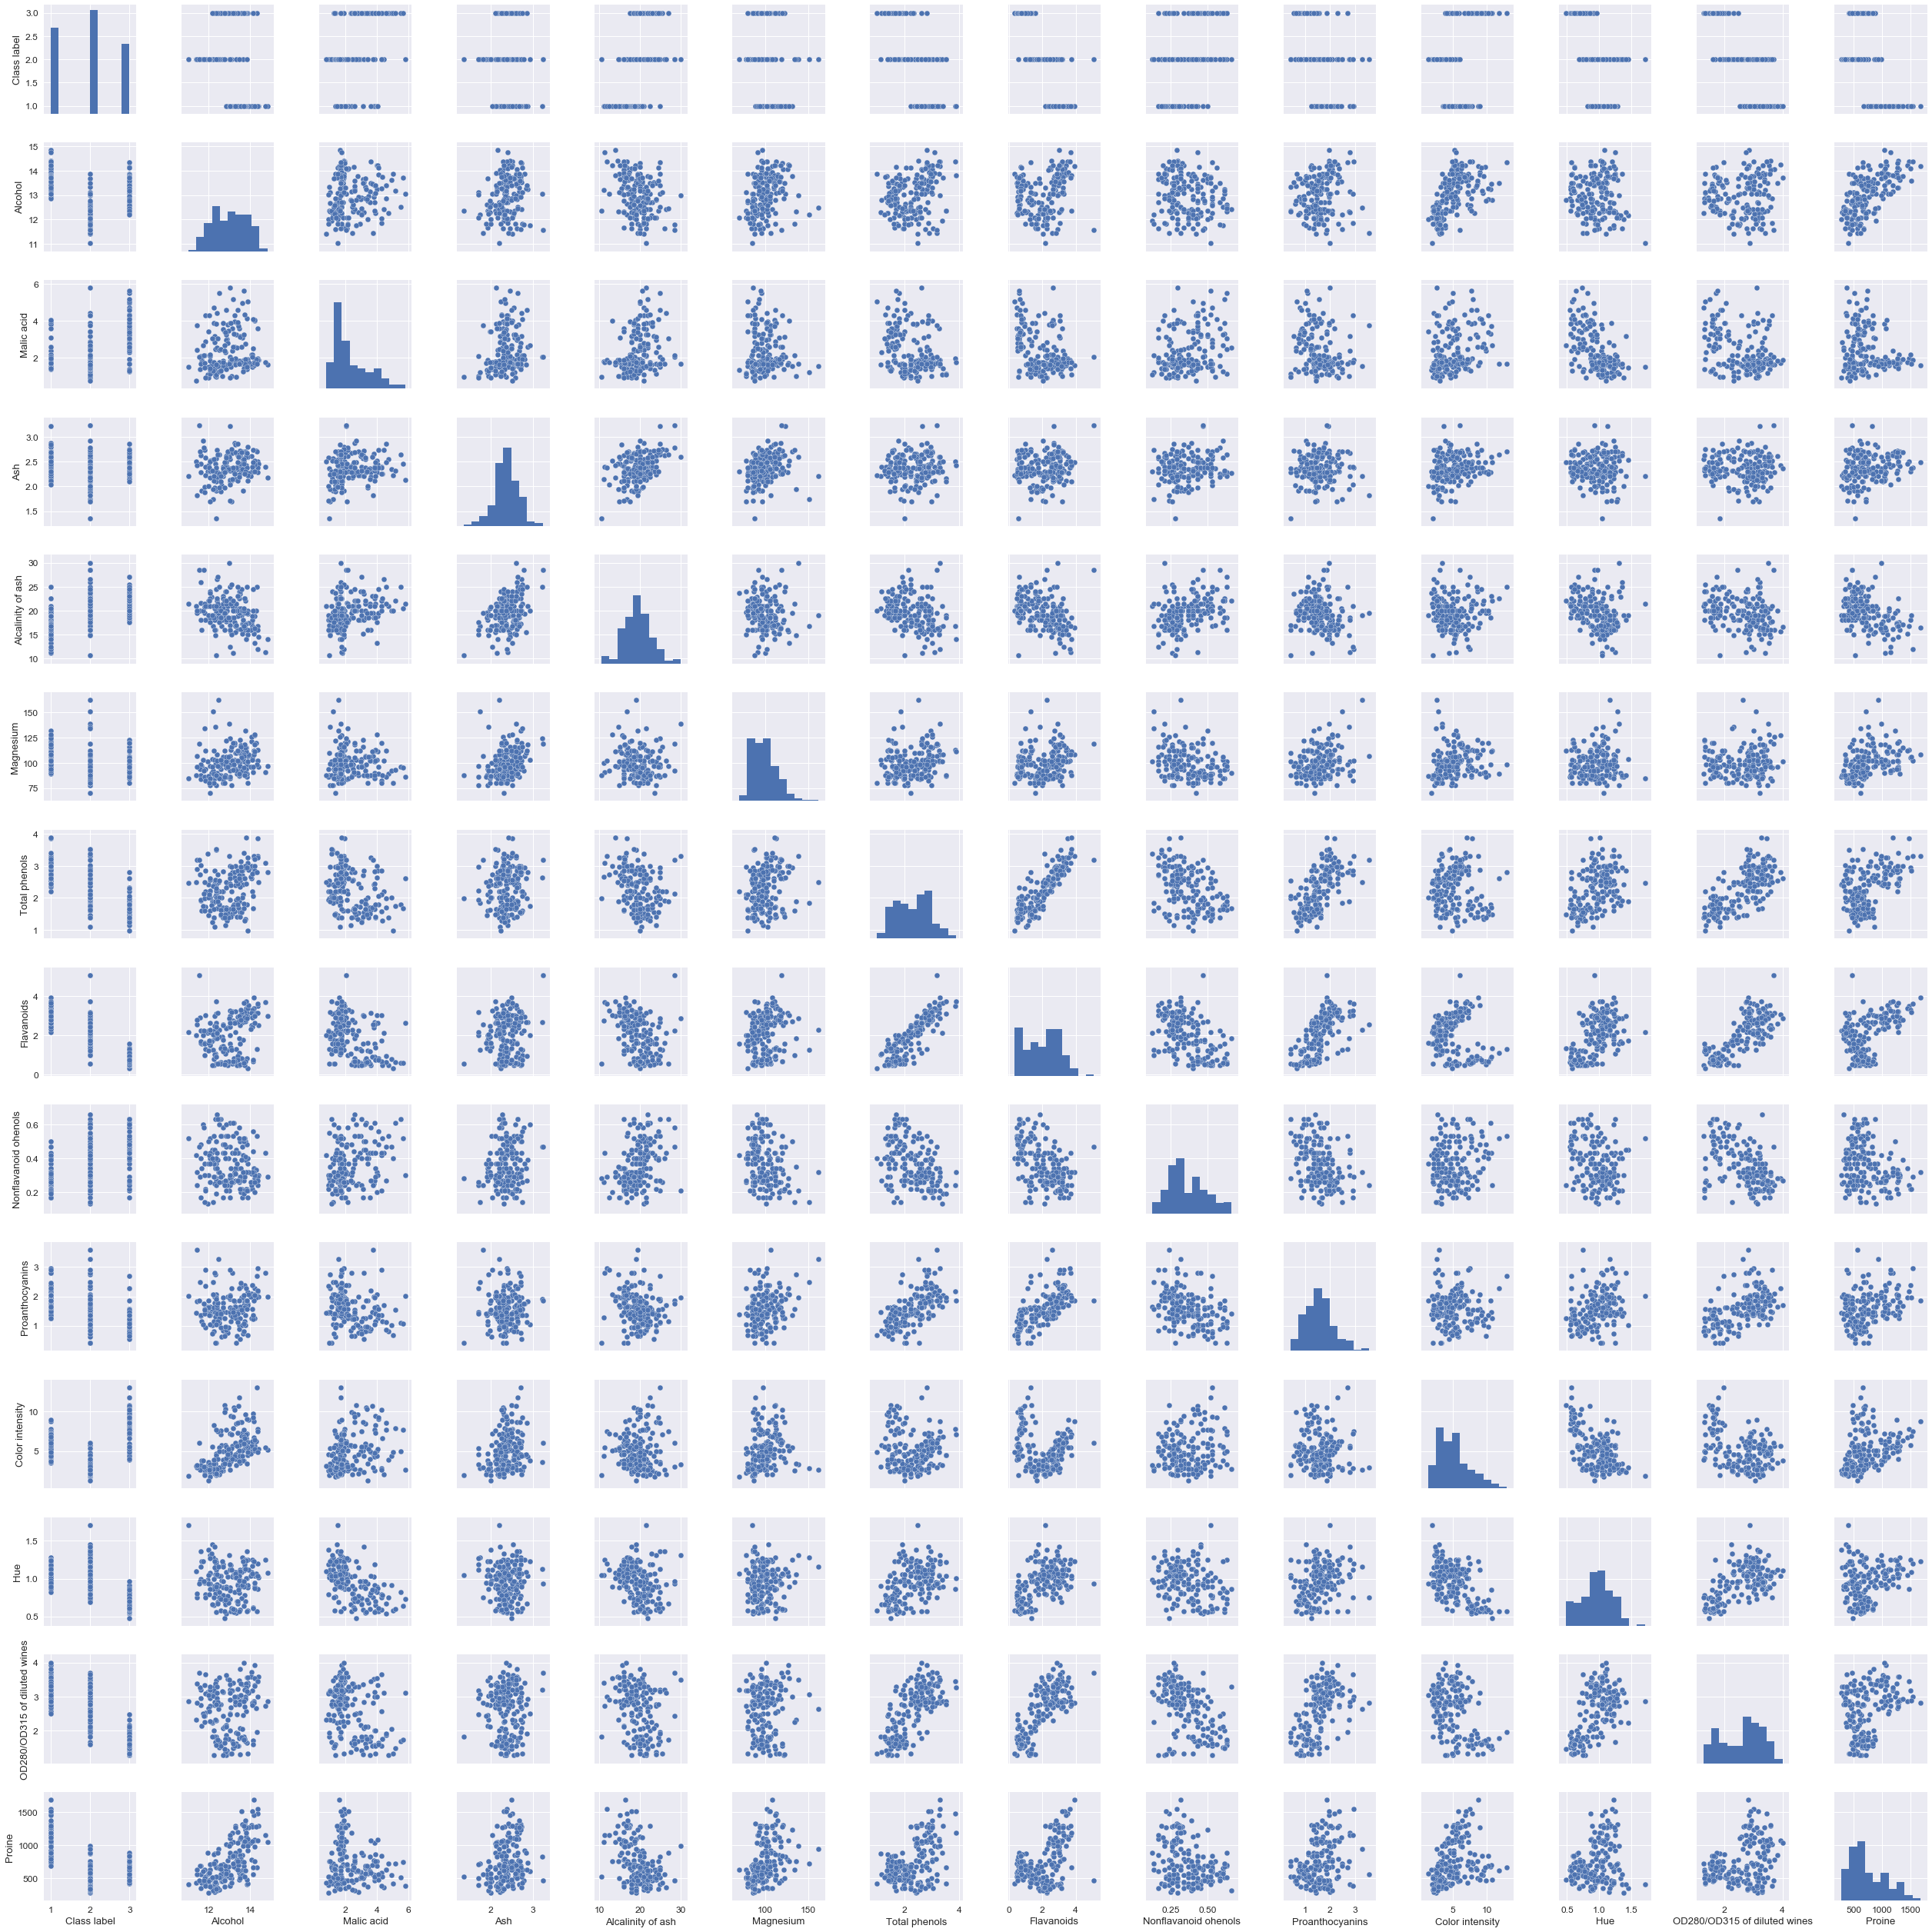

In [5]:
# cols = [0,98]
sns.pairplot(df_wine, size=2.5)
plt.tight_layout()
plt.savefig('scatter_diagram.png', dpi=300)
plt.show()

In [6]:
# split dataset
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, 
                     stratify=y,
                     random_state=42)

print('size of X:',X.shape)
print('size of y:',y.shape)
print('size of X_test:',X_test.shape)
print('size of y_test:',y_test.shape)

size of X: (178, 13)
size of y: (178,)
size of X_test: (36, 13)
size of y_test: (36,)


In [7]:
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
def output(model,X_train_std,y_train,X_test_std,y_test):
    y_train_pred = model.predict(X_train_std)
    print( 'train set accuracy score:' , metrics.accuracy_score(y_train, y_train_pred) )
    y_pred = model.predict(X_test_std)
    print( 'test set accuracy score:' ,metrics.accuracy_score(y_test, y_pred) )
    print( metrics.classification_report(y_test, y_pred) )
    print( metrics.confusion_matrix(y_test, y_pred) )

In [9]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
output(lr,X_train_std,y_train,X_test_std,y_test)

# SVM
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
output(svm,X_train_std,y_train,X_test_std,y_test)

train set accuracy score: 1.0
test set accuracy score: 0.9722222222222222
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        12
          2       0.93      1.00      0.97        14
          3       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        36

[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
train set accuracy score: 1.0
test set accuracy score: 0.9444444444444444
             precision    recall  f1-score   support

          1       0.92      1.00      0.96        12
          2       0.93      0.93      0.93        14
          3       1.00      0.90      0.95        10

avg / total       0.95      0.94      0.94        36

[[12  0  0]
 [ 1 13  0]
 [ 0  1  9]]


In [10]:
# PCA: logistic regression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
output(lr_pca,X_train_pca,y_train,X_test_pca,y_test)


# PCA: SVM
svm_pca = SVC(kernel='linear', C=1.0, random_state=1)
svm_pca.fit(X_train_pca, y_train)
output(svm_pca,X_train_pca,y_train,X_test_pca,y_test)

train set accuracy score: 0.971830985915493
test set accuracy score: 0.9444444444444444
             precision    recall  f1-score   support

          1       0.92      0.92      0.92        12
          2       0.93      0.93      0.93        14
          3       1.00      1.00      1.00        10

avg / total       0.94      0.94      0.94        36

[[11  1  0]
 [ 1 13  0]
 [ 0  0 10]]
train set accuracy score: 0.9788732394366197
test set accuracy score: 0.9166666666666666
             precision    recall  f1-score   support

          1       0.92      0.92      0.92        12
          2       0.87      0.93      0.90        14
          3       1.00      0.90      0.95        10

avg / total       0.92      0.92      0.92        36

[[11  1  0]
 [ 1 13  0]
 [ 0  1  9]]


In [11]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.fit_transform(X_test_std, y_test)

lr_lda = LogisticRegression()
lr_lda.fit(X_train_lda, y_train)

output(lr_lda,X_train_lda,y_train,X_test_lda,y_test)


svm_lda = SVC(kernel='linear', C=1.0, random_state=1)
svm_lda.fit(X_train_lda, y_train)
output(svm_lda,X_train_lda,y_train,X_test_lda,y_test)

train set accuracy score: 1.0
test set accuracy score: 0.9722222222222222
             precision    recall  f1-score   support

          1       1.00      0.92      0.96        12
          2       0.93      1.00      0.97        14
          3       1.00      1.00      1.00        10

avg / total       0.97      0.97      0.97        36

[[11  1  0]
 [ 0 14  0]
 [ 0  0 10]]
train set accuracy score: 1.0
test set accuracy score: 0.9722222222222222
             precision    recall  f1-score   support

          1       1.00      0.92      0.96        12
          2       0.93      1.00      0.97        14
          3       1.00      1.00      1.00        10

avg / total       0.97      0.97      0.97        36

[[11  1  0]
 [ 0 14  0]
 [ 0  0 10]]


In [12]:
# kPCA

from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, 
              kernel='rbf', gamma=15)

X_train_kpca = kpca.fit_transform(X_train_std, y_train)
X_test_kpca = kpca.fit_transform(X_test_std, y_test)

lr_kpca = LogisticRegression()
lr_kpca.fit(X_train_kpca, y_train)

output(lr_kpca,X_train_kpca,y_train,X_test_kpca,y_test)

svm_kpca = SVC(kernel='linear', C=1.0, random_state=1)
svm_kpca.fit(X_train_kpca, y_train)
output(svm_kpca,X_train_kpca,y_train,X_test_kpca,y_test)


train set accuracy score: 0.4295774647887324
test set accuracy score: 0.3333333333333333
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        12
          2       0.35      0.86      0.50        14
          3       0.00      0.00      0.00        10

avg / total       0.14      0.33      0.19        36

[[ 0 12  0]
 [ 1 12  1]
 [ 0 10  0]]
train set accuracy score: 0.4295774647887324
test set accuracy score: 0.3888888888888889
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        12
          2       0.39      1.00      0.56        14
          3       0.00      0.00      0.00        10

avg / total       0.15      0.39      0.22        36

[[ 0 12  0]
 [ 0 14  0]
 [ 0 10  0]]


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
for i in range(1,6):

    kpca = KernelPCA(n_components=2, 
                  kernel='rbf', gamma=i)
    X_train_kpca = kpca.fit_transform(X_train_std, y_train)
    X_test_kpca = kpca.fit_transform(X_test_std, y_test)
    lr_kpca = LogisticRegression()
    lr_kpca.fit(X_train_kpca, y_train)

    print('gamma = ', i)
    print('kPCA: lr accuracy score\ntrain dataset:',
          lr_kpca.score(X_train_kpca,y_train),
          '\ntest dataset:',svm_pca.score(X_test_kpca,y_test))

    svm_kpca = SVC(kernel='linear', C=1.0, random_state=1)
    svm_kpca.fit(X_train_kpca, y_train)


    print('kPCA: SVM accuracy score\ntrain dataset:',
          svm_kpca.score(X_train_kpca,y_train),
          '\ntest dataset:',svm_pca.score(X_test_kpca,y_test))
    print('------------------------------------------------------------')



gamma =  1
kPCA: lr accuracy score
train dataset: 0.5563380281690141 
test dataset: 0.4166666666666667
kPCA: SVM accuracy score
train dataset: 0.5 
test dataset: 0.4166666666666667
------------------------------------------------------------
gamma =  2
kPCA: lr accuracy score
train dataset: 0.4507042253521127 
test dataset: 0.4444444444444444
kPCA: SVM accuracy score
train dataset: 0.4295774647887324 
test dataset: 0.4444444444444444
------------------------------------------------------------
gamma =  3
kPCA: lr accuracy score
train dataset: 0.4295774647887324 
test dataset: 0.4444444444444444
kPCA: SVM accuracy score
train dataset: 0.4014084507042254 
test dataset: 0.4444444444444444
------------------------------------------------------------
gamma =  4
kPCA: lr accuracy score
train dataset: 0.4295774647887324 
test dataset: 0.3888888888888889
kPCA: SVM accuracy score
train dataset: 0.4014084507042254 
test dataset: 0.3888888888888889
------------------------------------------------

In [14]:
print("My name is {Changjie Ma}")
print("My NetID is: {cma17}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Changjie Ma}
My NetID is: {cma17}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
